# AIR POLLUTION LIDAR SIGNALS CLASSIFICATION BASED ON MACHINE LEARNING METHODS

## Author: Jyoti Sarpal 
## Honey Gupta

### Problem statement: In this project, we try to classify lidar signals to evaluate and find the concentration percentages of nitrogen dioxide and sulfur dioxide by comparing several machine learning methods like Linear Regression, SVM, Random Forest (RF), Logistic Regression (LR).

In [62]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = p.read_excel("city_day.xlsx")    #reading the dataset file using pandas

In [4]:
#Discovering the data 

In [5]:
data.head(10)         # give first 10 row command name attribute and variables

,City,Date,NO2,SO2
0,Ahmedabad,2020-06-01,22.62,NaN
1,Ahmedabad,2020-06-02,41.56,20.08
2,Ahmedabad,2020-06-03,43.36,23.71
3,Ahmedabad,2020-06-04,37.30,21.29
4,Ahmedabad,2020-06-05,33.60,14.73
5,Ahmedabad,2020-06-06,39.76,14.40
6,Ahmedabad,2020-06-07,34.11,13.05
7,Ahmedabad,2020-06-08,28.47,11.60
8,Ahmedabad,2020-06-09,25.68,12.69
9,Ahmedabad,2020-06-10,20.92,16.22


In [6]:
data.tail()       # give last 5 rows of the dataset

,City,Date,NO2,SO2
747,Visakhapatnam,2020-06-26,23.27,6.87
748,Visakhapatnam,2020-06-27,25.06,8.55
749,Visakhapatnam,2020-06-28,26.06,12.72
750,Visakhapatnam,2020-06-29,29.53,8.42
751,Visakhapatnam,2020-06-30,29.26,9.84


In [7]:
data.shape             #shows number of rows and columns in the dataset

(752, 4)

In [8]:
data.columns

Index(['City', 'Date', 'NO2', 'SO2'], dtype='object')

In [9]:
data.describe()        # Generate descriptive statistics

,NO2,SO2
count,700.000000,726.000000
mean,15.448929,9.498595
std,11.277424,5.072513
min,0.050000,0.950000
25%,8.415000,5.712500
50%,12.675000,8.390000
75%,20.227500,12.337500
max,58.920000,31.020000


In [10]:
data.info()
#information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   City    752 non-null    object        
 1   Date    752 non-null    datetime64[ns]
 2   NO2     700 non-null    float64       
 3   SO2     726 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 20.6+ KB


In [11]:
#STEP 1: Data validation and Preprocessing
# Cleaning up the data (Cleansing the data)
# Converting raw data to clean dataset

In [12]:
df= data.dropna()  #used to remove rows and columns with Null/NaN

In [13]:
df.shape

(699, 4)

In [14]:
df.duplicated()   #Checking for duplicate values and eliminating them one by one

1      False
2      False
3      False
4      False
5      False
       ...  
747    False
748    False
749    False
750    False
751    False
Length: 699, dtype: bool

In [15]:
sum(df.duplicated()) 

0

In [16]:
df.isnull().sum()    #Checking for missing values

City    0
Date    0
NO2     0
SO2     0
dtype: int64

In [17]:
num=df._get_numeric_data()  #Checking for numeric data if negative values are there need to be replaced
num[num<0]=0
data

,City,Date,NO2,SO2
0,Ahmedabad,2020-06-01,22.62,NaN
1,Ahmedabad,2020-06-02,41.56,20.08
2,Ahmedabad,2020-06-03,43.36,23.71
3,Ahmedabad,2020-06-04,37.30,21.29
4,Ahmedabad,2020-06-05,33.60,14.73
...,...,...,...,...
747,Visakhapatnam,2020-06-26,23.27,6.87
748,Visakhapatnam,2020-06-27,25.06,8.55
749,Visakhapatnam,2020-06-28,26.06,12.72
750,Visakhapatnam,2020-06-29,29.53,8.42


In [18]:
print("Minimum value of NO2 is:",df.NO2.min())
print("Minimum value of SO2 is:",df.SO2.min())
print("Maximum value of SO2 is:",df.SO2.max())
print("Maximum value of NO2 is:",df.NO2.max())

Minimum value of NO2 is: 0.05
Minimum value of SO2 is: 0.95
Maximum value of SO2 is: 30.6
Maximum value of NO2 is: 58.92


In [19]:
print("NO2 POLLUTION RANGE:",sorted(df['NO2'].unique())) #Printing range or unique values

NO2 POLLUTION RANGE: [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.13, 0.14, 0.15, 0.16, 0.18, 0.21, 0.22, 0.25, 0.26, 0.29, 0.31, 0.32, 0.33, 0.37, 0.38, 0.52, 0.53, 0.59, 0.6, 0.61, 0.7, 0.71, 0.76, 0.83, 1.25, 1.53, 1.54, 1.55, 1.59, 1.65, 1.72, 1.74, 1.82, 1.84, 1.88, 1.89, 1.91, 2.0, 2.06, 2.12, 2.14, 2.16, 2.17, 2.19, 2.2, 2.21, 2.29, 2.34, 2.35, 2.36, 2.38, 2.4, 2.41, 2.42, 2.49, 2.5, 2.62, 2.63, 2.64, 2.65, 2.71, 2.73, 2.75, 2.76, 2.78, 2.85, 2.88, 2.89, 2.92, 2.94, 2.95, 2.97, 3.01, 3.03, 3.05, 3.06, 3.07, 3.09, 3.1, 3.12, 3.37, 4.28, 4.65, 5.02, 5.11, 5.18, 5.19, 5.4, 5.42, 5.43, 5.54, 5.73, 5.93, 6.21, 6.26, 6.29, 6.38, 6.53, 6.54, 6.58, 6.61, 6.79, 6.8, 6.83, 6.87, 6.88, 6.9, 6.91, 6.97, 7.06, 7.21, 7.36, 7.38, 7.4, 7.41, 7.42, 7.44, 7.49, 7.52, 7.55, 7.69, 7.72, 7.85, 7.87, 7.9, 7.91, 7.92, 7.94, 7.97, 8.0, 8.01, 8.02, 8.05, 8.06, 8.09, 8.1, 8.12, 8.14, 8.16, 8.21, 8.22, 8.24, 8.31, 8.32, 8.33, 8.37, 8.43, 8.44, 8.53, 8.57, 8.58, 8.6, 8.61, 8.63, 8.64, 8.73, 8.75, 8.8, 8.83, 8.86,

In [20]:
print("SO2 POLLUTION RANGE:",sorted(df['SO2'].unique()))

SO2 POLLUTION RANGE: [0.95, 1.03, 1.08, 1.24, 1.38, 1.76, 1.91, 2.03, 2.23, 2.33, 2.39, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.74, 2.75, 2.76, 2.8, 2.82, 2.84, 2.85, 2.86, 2.88, 2.92, 2.98, 3.15, 3.16, 3.22, 3.24, 3.25, 3.36, 3.39, 3.6, 3.63, 3.73, 3.74, 3.75, 3.77, 3.79, 3.91, 3.92, 3.97, 4.03, 4.04, 4.05, 4.06, 4.15, 4.18, 4.22, 4.28, 4.31, 4.36, 4.4, 4.44, 4.49, 4.52, 4.55, 4.56, 4.63, 4.64, 4.65, 4.67, 4.69, 4.72, 4.76, 4.77, 4.79, 4.86, 4.87, 4.89, 4.93, 4.94, 4.98, 5.0, 5.01, 5.03, 5.04, 5.05, 5.06, 5.08, 5.12, 5.13, 5.16, 5.17, 5.19, 5.2, 5.22, 5.23, 5.24, 5.26, 5.27, 5.28, 5.29, 5.3, 5.31, 5.32, 5.33, 5.34, 5.35, 5.36, 5.38, 5.39, 5.4, 5.41, 5.42, 5.43, 5.44, 5.45, 5.46, 5.48, 5.49, 5.5, 5.53, 5.54, 5.55, 5.56, 5.57, 5.59, 5.62, 5.65, 5.66, 5.69, 5.7, 5.71, 5.72, 5.73, 5.74, 5.75, 5.77, 5.78, 5.79, 5.8, 5.81, 5.82, 5.83, 5.85, 5.86, 5.88, 5.89, 5.9, 5.91, 5.92, 5.93, 5.94, 6.0, 6.02, 6.03, 6.04, 6.05, 6.07, 6.08, 6.12, 6.14, 6.18, 6.19, 6.2, 6.22, 6.23, 6.

In [21]:
df['SO2'].value_counts() #containing counts of unique values

5.69     4
5.45     4
2.76     4
4.65     3
10.70    3
        ..
28.07    1
5.74     1
11.22    1
18.82    1
9.14     1
Name: SO2, Length: 545, dtype: int64

In [22]:
df['NO2'].value_counts()

0.07     4
2.73     4
12.38    3
9.17     3
10.59    3
        ..
24.30    1
42.96    1
22.78    1
26.53    1
0.25     1
Name: NO2, Length: 609, dtype: int64

In [23]:
# Exploration of data and it's visual analysis 
#applying when trying to explain the insight obtained from the analysis of increasingly large datasets. 

In [24]:
p.crosstab(df.City,df.NO2) #finding relationship between city and no2  concentration values

NO2,0.05,0.06,0.07,0.08,0.09,0.10,0.13,0.14,0.15,0.16,...,49.22,50.11,50.45,50.96,52.10,53.12,53.34,53.59,56.35,58.92
City,,,,,,,,,,,,,,,,,,,,,
Ahmedabad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
Aizawl,1,1,4,1,1,2,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Amaravati,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amritsar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Bengaluru,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bhopal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brajrajnagar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chandigarh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chennai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
p.crosstab(df.City,df.SO2) #finding relationship between city and so2 concentration values

SO2,0.95,1.03,1.08,1.24,1.38,1.76,1.91,2.03,2.23,2.33,...,21.36,21.49,21.50,21.54,21.58,22.70,23.71,28.07,30.46,30.60
City,,,,,,,,,,,,,,,,,,,,,
Ahmedabad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Aizawl,1,1,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Amaravati,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amritsar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bengaluru,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bhopal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Brajrajnagar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chandigarh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chennai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


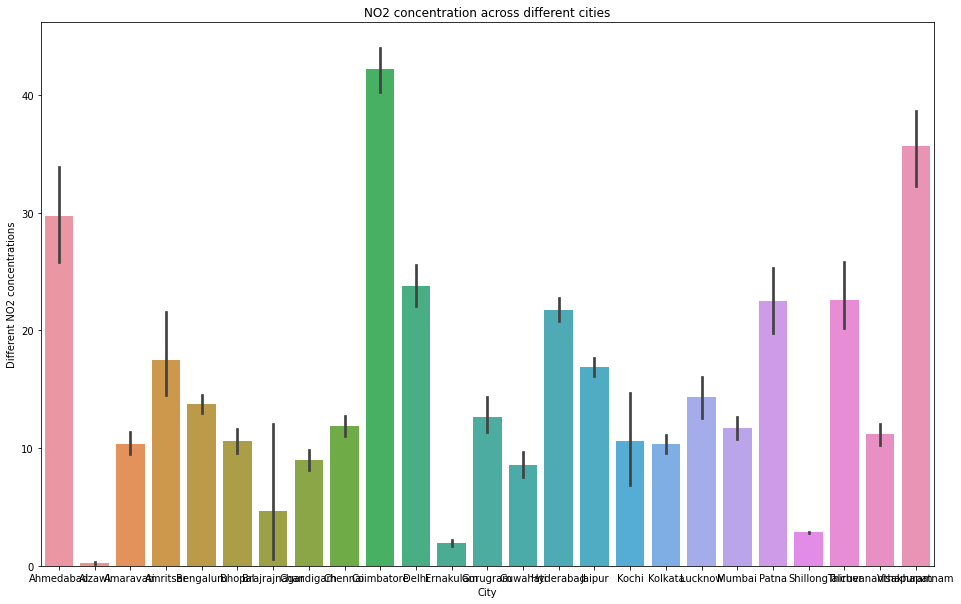

In [26]:
fig ,ax = plt.subplots(figsize=(16,10))
ax = s.barplot(x='City',y='NO2',data=df)
ax.set(ylabel='Different NO2 concentrations',title = 'NO2 concentration across different cities')
plt.show()

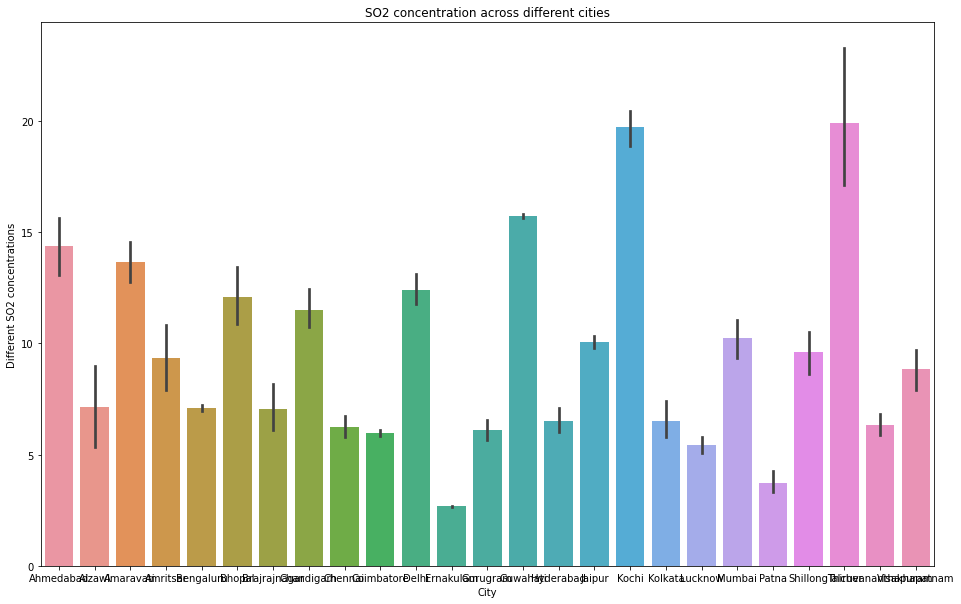

In [27]:
fig ,ax = plt.subplots(figsize=(16,10))
ax = s.barplot(x='City',y='SO2',data=df)
ax.set(ylabel='Different SO2 concentrations',title = 'SO2 concentration across different cities')
plt.show()

<AxesSubplot:>

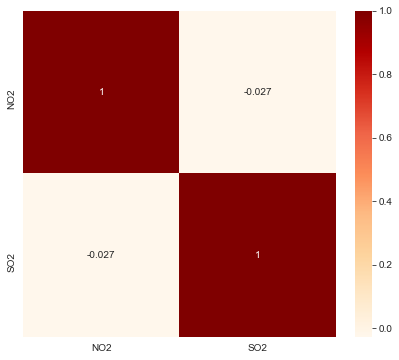

In [48]:
# Heatmap : two-dimensional graphical representation of data
#correlation heatmap
plt.figure(figsize=(7,6))
correlation=df.corr()
s.heatmap(correlation,annot=True,cmap='OrRd')

<AxesSubplot:title={'center':'NO2'}, xlabel='City'>

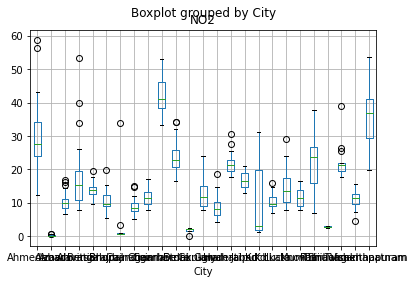

In [29]:
df.boxplot(column='NO2', by='City') #No2 concentration values among different cities

<AxesSubplot:title={'center':'SO2'}, xlabel='City'>

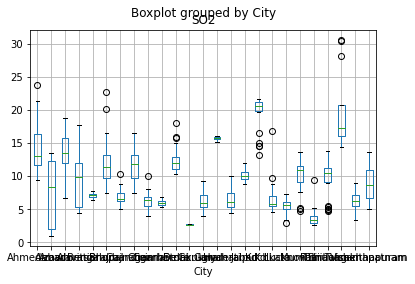

In [30]:
df.boxplot(column='SO2', by='City')   #So2 concentration values among different cities

In [31]:
df.corr()    # Correlation of SO2 and NO2  usually values between -1 and +1

,NO2,SO2
NO2,1.000000,-0.027369
SO2,-0.027369,1.000000


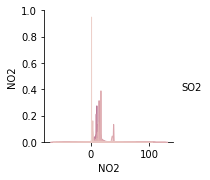

In [32]:
s.pairplot(df,hue = 'SO2')  

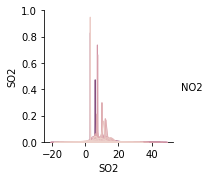

In [33]:
s.pairplot(df,hue = 'NO2') 

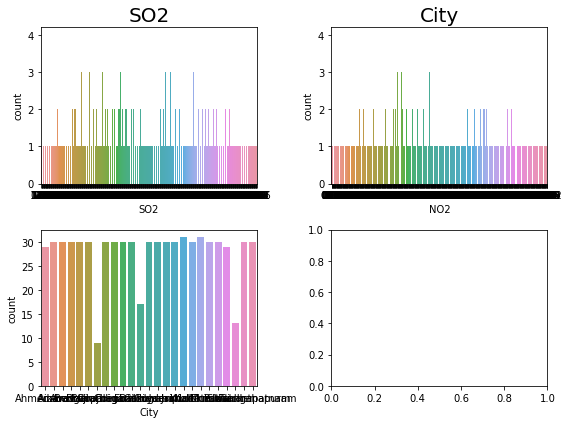

In [34]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(8,6));

s.countplot(df['SO2'],ax=axs[0][0])
s.countplot(df['NO2'],ax=axs[0][1])
s.countplot(df['City'],ax=axs[1][0])
axs[0][0].set_title('SO2',fontsize=20)
axs[0][1].set_title('NO2',fontsize=20)
axs[0][1].set_title('City',fontsize=20)



plt.tight_layout()


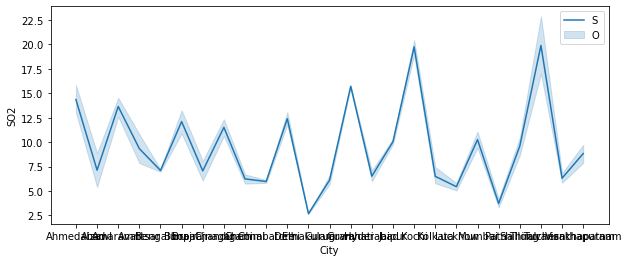

In [35]:
#Line plot
plt.figure(figsize=(10,4))
s.lineplot(x='City',y='SO2',data=df)
plt.legend('SO2 Concentration across different Cities')

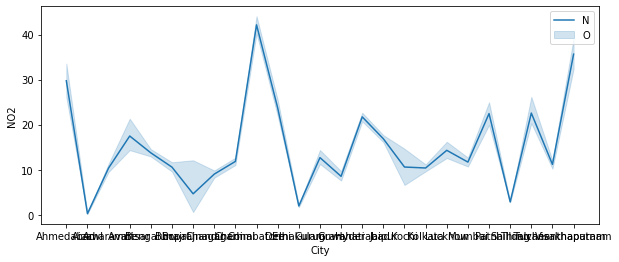

In [36]:
#Line plot
plt.figure(figsize=(10,4))
s.lineplot(x='City',y='NO2',data=df)
plt.legend('NO2 Concentration across different Cities')

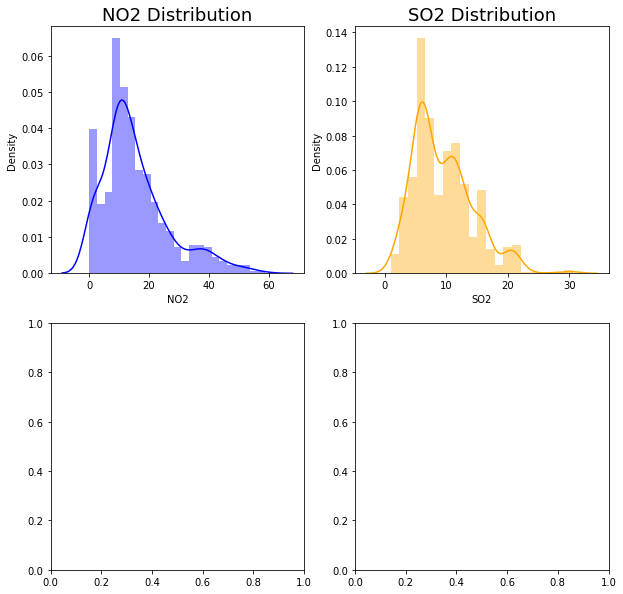

In [37]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))
s.distplot(df['NO2'], color = 'blue',  ax = axs[0][0])
s.distplot(df['SO2'], color = 'orange',  ax = axs[0][1])
axs[0][0].set_title('NO2 Distribution', fontsize = 18)
axs[0][1].set_title('SO2 Distribution', fontsize = 18)
plt.show()

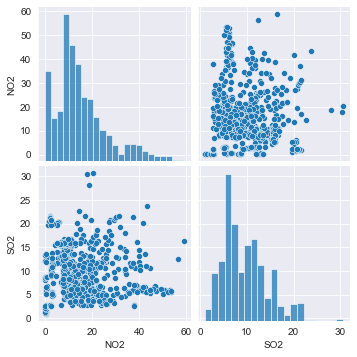

In [50]:
s.pairplot(df)

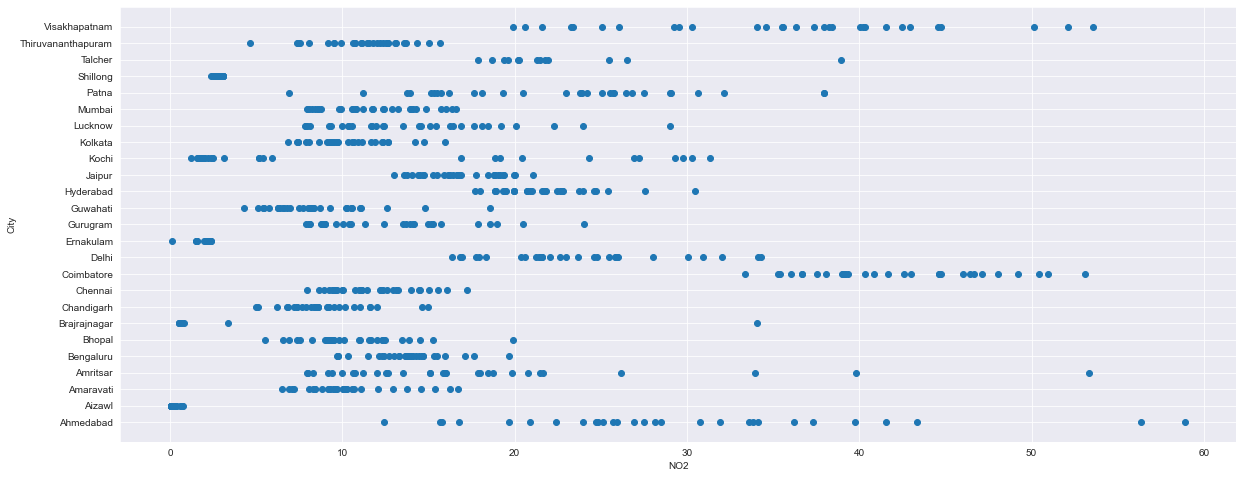

In [52]:
fig,ax=plt.subplots(figsize=(20,8))   #scatterplots
ax.scatter(df['NO2'],df['City'])
ax.set_xlabel('NO2')
ax.set_ylabel('City')
plt.show()

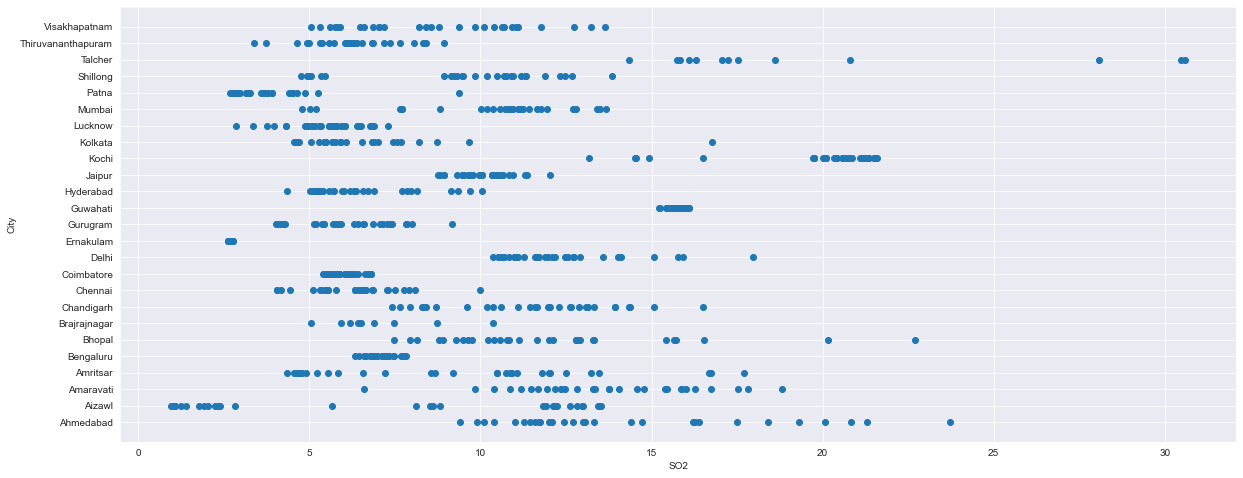

In [53]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(df['SO2'],df['City'])
ax.set_xlabel('SO2')
ax.set_ylabel('City')
plt.show()

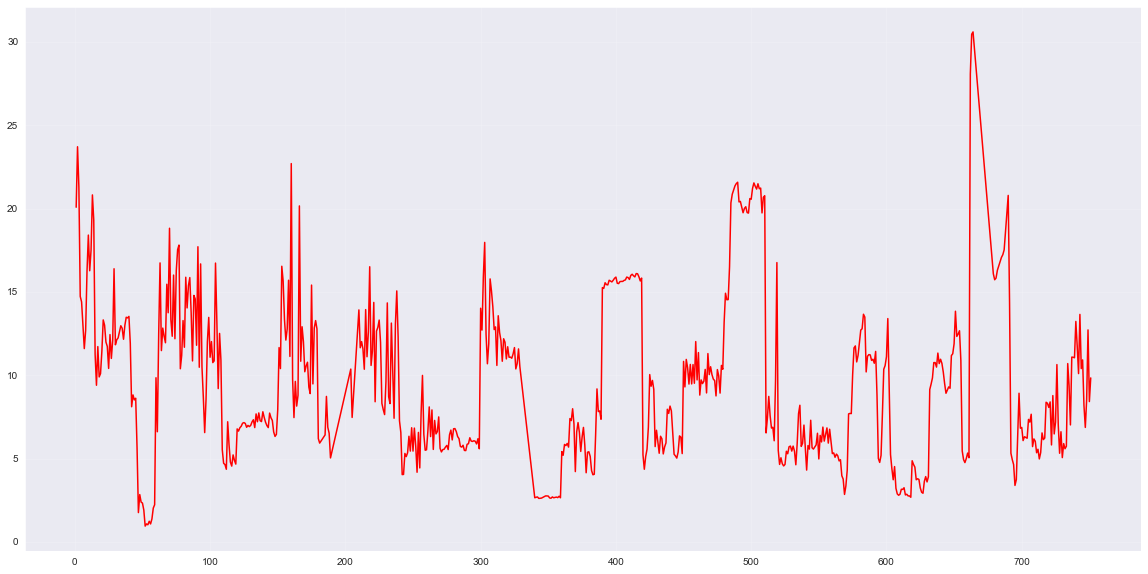

In [54]:
plt.figure(figsize=(20,10))
plt.plot(df['SO2'], color='red')
plt.grid(alpha=0.2)

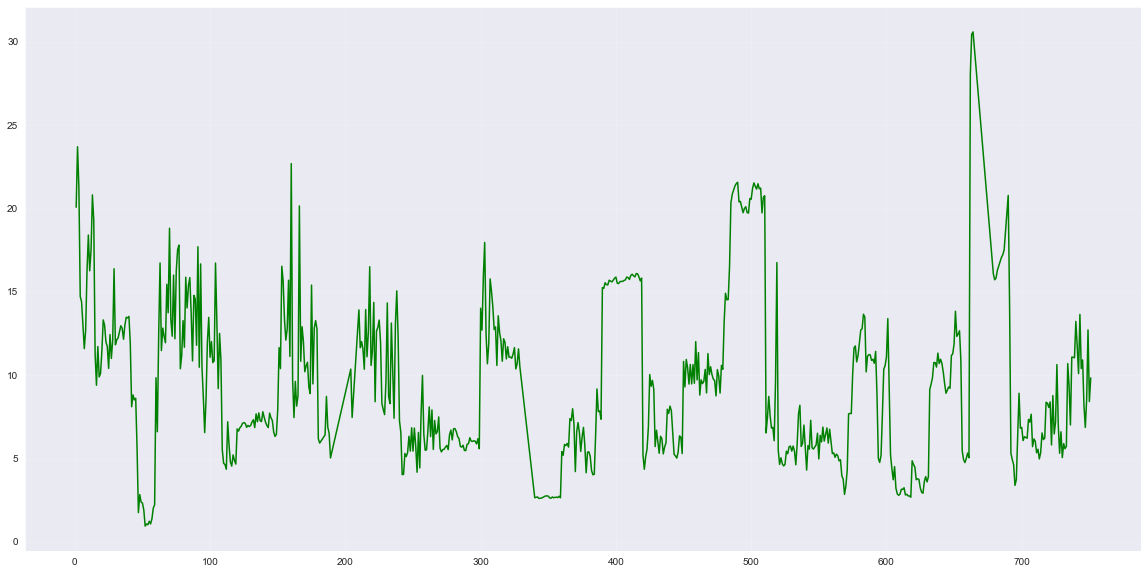

In [55]:
plt.figure(figsize=(20,10))
plt.plot(df['SO2'], color='green')
plt.grid(alpha=0.2)

# Observations